In [ ]:
import pandas as pd
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import ast
import seaborn as sns

In [73]:
df = pd.read_csv('../../data/interim/interim_data.csv')
df


,text,label,tokens,tokens_lematizados,cleaned_text,mapped_label
0,Wall St. Bears Claw Back Into the Black (Reute...,2,"['wall', 'st', 'bears', 'claw', 'back', 'into'...","['wall', 'st', 'bears', 'claw', 'back', 'black...",wall st bears claw back black reuters reuters ...,Business
1,Carlyle Looks Toward Commercial Aerospace (Reu...,2,"['carlyle', 'looks', 'toward', 'commercial', '...","['carlyle', 'look', 'toward', 'commercial', 'a...",carlyle look toward commercial aerospace reute...,Business
2,Oil and Economy Cloud Stocks' Outlook (Reuters...,2,"['oil', 'and', 'economy', 'cloud', 'stocks', '...","['oil', 'economy', 'cloud', 'stock', 'outlook'...",oil economy cloud stock outlook reuters reuter...,Business
3,Iraq Halts Oil Exports from Main Southern Pipe...,2,"['iraq', 'halts', 'oil', 'exports', 'from', 'm...","['iraq', 'halt', 'oil', 'export', 'main', 'sou...",iraq halt oil export main southern pipeline re...,Business
4,"Oil prices soar to all-time record, posing new...",2,"['oil', 'prices', 'soar', 'to', 'alltime', 're...","['oil', 'price', 'soar', 'alltime', 'record', ...",oil price soar alltime record pose new menace ...,Business
...,...,...,...,...,...,...
127595,Around the world Ukrainian presidential candid...,0,"['around', 'the', 'world', 'ukrainian', 'presi...","['around', 'world', 'ukrainian', 'presidential...",around world ukrainian presidential candidate ...,World
127596,Void is filled with Clement With the supply of...,1,"['void', 'is', 'filled', 'with', 'clement', 'w...","['void', 'fill', 'clement', 'supply', 'attract...",void fill clement supply attractive pitching o...,Sports
127597,Martinez leaves bitter Like Roger Clemens did ...,1,"['martinez', 'leaves', 'bitter', 'like', 'roge...","['martinez', 'leave', 'bitter', 'like', 'roger...",martinez leave bitter like roger clemen almost...,Sports
127598,5 of arthritis patients in Singapore take Bext...,2,"['5', 'of', 'arthritis', 'patients', 'in', 'si...","['5', 'arthritis', 'patient', 'singapore', 'ta...",5 arthritis patient singapore take bextra cele...,Business


In [74]:
df['tokens_lematizados'] = df['tokens_lematizados'].apply(ast.literal_eval)

In [ ]:
def gerar_wordcloud(tokens, title='WordCloud'):
    text = ' '.join(tokens)
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

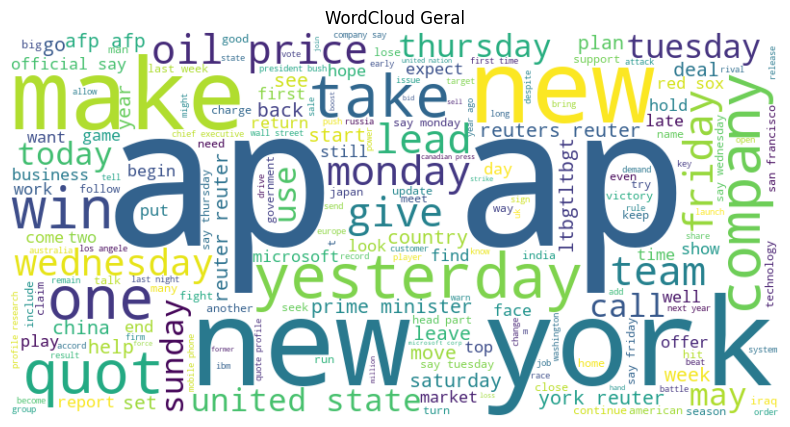

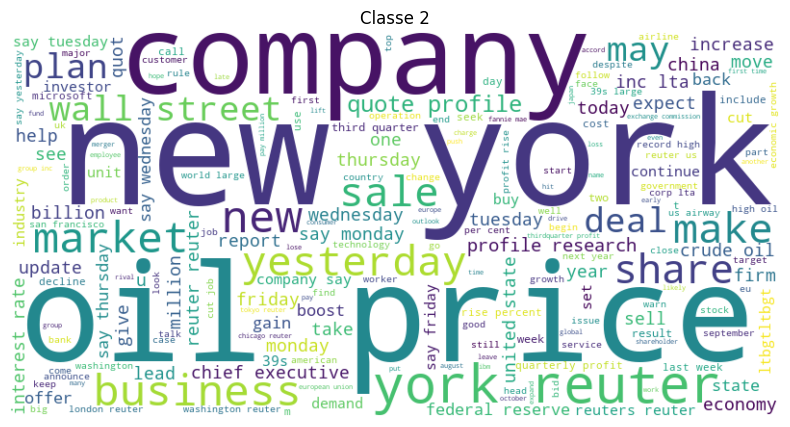

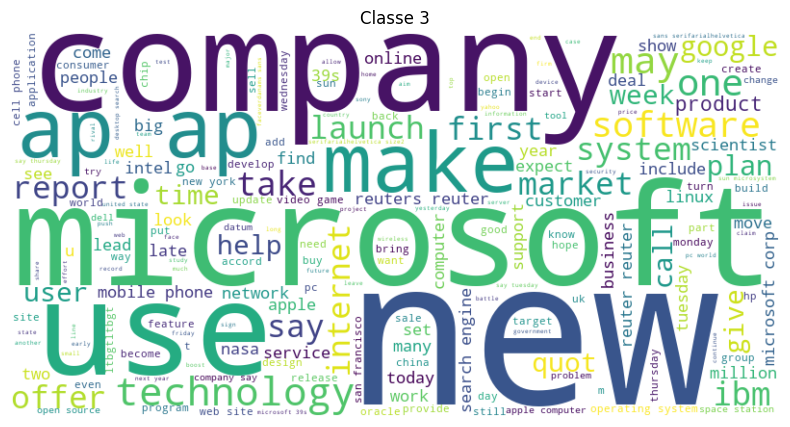

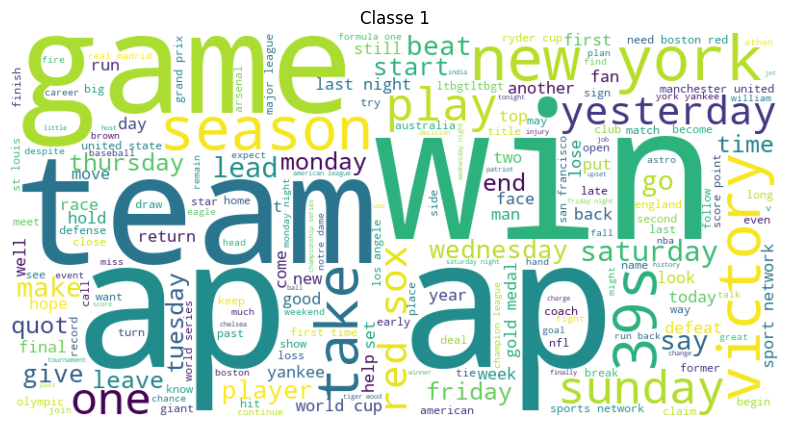

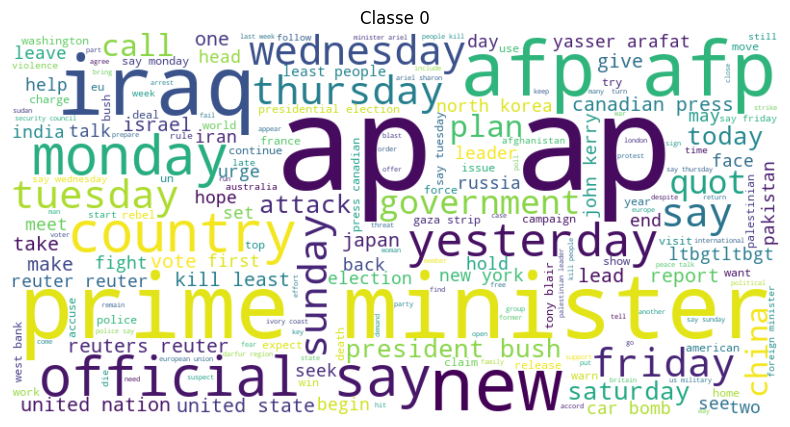

In [75]:
gerar_wordcloud(df['tokens_lematizados'].explode().dropna().tolist(), 'WordCloud Geral')

for classe in df['label'].unique():
    subset = df[df['label'] == classe]
    gerar_wordcloud(subset['tokens_lematizados'].explode().dropna().tolist(), f'Classe {classe}')


In [ ]:
def plot_class_distribution(df, label_col='label'):
    plt.figure(figsize=(8,5))
    sns.countplot(x=label_col, data=df)
    plt.title("Distribuição de Classes")
    plt.xlabel("Classe")
    plt.ylabel("Contagem")
    plt.show()